In [72]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# ROHIL 101

Welcome to Lab `Rohil 101`. Hope you are doing well, and excited to teach budding data scientists all about the length and breadth of the concepts of Numpy arrays and the power of Confidence intervals among other topics. In this lab, Rohil Kanwar, an absolute Data 8 enthusiast just like you and two-time (Spring 2019 and Fall 2019) lab assistant attempts to explain how he can add value to this amazing course by assuming the role of a course tutor. 

### Q1. What makes me a good tutor?

(The following points are based on feedback I have received from my students over the aforementioned two semesters)

#### Tutor Quality 1 : I try to see the problem through the lens of the student, and then very gradually from there, attempt to make them understand wherein lies the problem.

For instance, here is `Q4.2` from `lab02` in Fall 2019. 

In [2]:
# Just run this cell

imdb = Table.read_table('imdb.csv')
imdb

Votes,Rating,Title,Year,Decade
88355,8.4,M,1931,1930
132823,8.3,Singin' in the Rain,1952,1950
74178,8.3,All About Eve,1950,1950
635139,8.6,Léon,1994,1990
145514,8.2,The Elephant Man,1980,1980
425461,8.3,Full Metal Jacket,1987,1980
441174,8.1,Gone Girl,2014,2010
850601,8.3,Batman Begins,2005,2000
37664,8.2,Judgment at Nuremberg,1961,1960
46987,8,Relatos salvajes,2014,2010


**Question 4.2.** Create a table of movies released between 2010 and 2016 (inclusive) with ratings above 8. The table should only contain the columns `Title` and `Rating`, **in that order**.

Assign the table to the name `above_eight`.

*Hint:* Think about the steps you need to take, and try to put them in an order that make sense. Feel free to create intermediate tables for each step, but please make sure you assign your final table the name `above_eight`!

<!--
BEGIN QUESTION
name: q42
-->

###### Illustrated below is a common student solution!

In [3]:
above_eight = imdb.select(1,2).where('Year',are.between(2010, 2016),'Rating', are.above(8))
above_eight

TypeError: where() takes from 2 to 4 positional arguments but 5 were given

Now, even though the above code shows a fair understanding of what concepts to be used by the student, there needs to be some work done here to work them through the process of fixing this code. Thus, I use the following 3-step process to assist the student with this problem.

**STEP 1** I ask the student to narrate to me what they understand that the question is asking them to do. This is to make sure that they're not solving a different problem than what is asked. A plausible answer could be to produce a two column table containing movies released between 2010 and 2016 and having a rating above 8, or simply an "I don't know" which is also a completely valid answer. 

Now, type(StudentAns) = str<br>
So, 

    if (StudentAns = "I don't know"):
         print("I read the question sentence by sentence and ask them to summarize in their own words what the question is              asking")
     elif (StudentAns != correct interpretation of the question):
         print("I ask them to reread the part of the problem that they are probably misinterpreting")
     else:
         print("Yes, you are absolutely right! Great job, because half the job is already done when we understand what to do. Now, all we have to do is implement it in code. However, we tried that and we encountered an error. So what do you think we should do at this point? Maybe it'd be a good idea to go through the code line-by-line to see where the error is, but luckily, the Jupyter notebook does that job for us. Do you want to take a quick look at the error?")
         
So, as you may have noticed, I tried to put myself in the shoes of the student, who is probably a beginner programmer who wants to understand the syntax of the datascience module. Therefore, I tried to walk them through what, in my opinion, could be going on in their head, when they're faced with an error. 
         
#### Tutor Quality 2 : I draw from my own experiences i.e. from when I was taking Data 8, to make the student feel more comfortable to make mistakes in front of me and ask me the smallest and the most basic questions.
         
**STEP 2** Now, once the student has identified the problem, it is common to feel vulnerable for the student and feel slightly bad about not having figured out the problem in the first place. If this is the case,  I believe it is really important for them to be able to trust that I will not draw a conclusion about their intelligence level based on what mistake they made. Thus, at this point, I would usually share a small story about how I encountered a similar problem back when I was taking a class. For instance, 

    "By the way, when I was learning table methods like select, where, with_columns etc. I used to always wonder why couldn't you put multiple filtering conditions in the where method, when you could create multiple columns in a table with the 'with_columns' method. But, it turns out, we need an independent 'where' for each filtering condition. Just a syntax thing, you'll be familiar with it really soon. Perhaps you could check out the documentation on the Data 8 Resources webpage, whenever you're a unsure of a syntactical thing."
    
    "Heyy also, I'm really glad you asked me to help you with this, because you just helped me stay familiar with table operations, even when I'm not taking the class. Always feel free to ask me whatever questions that may pop up in your mind. And if they're about my opinions on Trump's impeachment, maybe we could talk about that while grabbing coffee outside because we might need a little more time for that than what this lab offers :p But, honestly, no question is a dumb question, and I would love it if you could help me remember the smallest things related to Data 8 material by asking me questions! :)"

****Once we fix the where problem, the code should look something like this :****

In [4]:
above_eight = imdb.select(2,1).where('Year',are.between(2010, 2017)).where('Rating', are.above(8))
above_eight

ValueError: label "Year" not in labels ('Title', 'Rating')

#### Tutor Quality 3 : I try to teach them long-term practices and methods. 

**STEP 3** When we encounter the aforementioned ValueError, the student might have been able to spot the error this time and identify the problem. However, since this error is not conceptual and Jupyter notebook doesn't quite tell us what part of this line of code caused the error, I try to advise them to break down the line of code to the simplest elements (using the period (.) as the separator in case of table operations) and then check for the error. 

    "Wow, you're a quick learner. So yes, this time it's a ValueError that says the label 'Year' is not in the table. But how could this be, you wanna try to see what Python must be encountering for it to say that it can't find the column 'Year' in the table? So, whenever I encountered errors like this, I always used to break down my code into simpler elements to find the location of the error. So, I would first check if there is an error with 'imdb', then with the 'select' method, then with the 'where method' since that's how Python executes the code. The way to check for errors is simply to print the simpler code at each step. As you might remember, Jupyter notebook automatically prints the last line of code in a cell, so you could use that. This is a pretty useful technique for debugging. Go ahead, and give it a try!"

***The student will then likely perform the following operations.***

In [5]:
imdb

Votes,Rating,Title,Year,Decade
88355,8.4,M,1931,1930
132823,8.3,Singin' in the Rain,1952,1950
74178,8.3,All About Eve,1950,1950
635139,8.6,Léon,1994,1990
145514,8.2,The Elephant Man,1980,1980
425461,8.3,Full Metal Jacket,1987,1980
441174,8.1,Gone Girl,2014,2010
850601,8.3,Batman Begins,2005,2000
37664,8.2,Judgment at Nuremberg,1961,1960
46987,8,Relatos salvajes,2014,2010


In [6]:
imdb.select(1,2)

Rating,Title
8.4,M
8.3,Singin' in the Rain
8.3,All About Eve
8.6,Léon
8.2,The Elephant Man
8.3,Full Metal Jacket
8.1,Gone Girl
8.3,Batman Begins
8.2,Judgment at Nuremberg
8,Relatos salvajes


The student likely notices the problem here, and realizes that all that was wrong was the order of their table methods. Then, they fix it and the code looks something like this!

In [7]:
above_eight = imdb.where('Year',are.between(2010, 2017)).where('Rating', are.above(8)).select(2,1)
above_eight

Title,Rating
Gone Girl,8.1
Warrior,8.2
Intouchables,8.5
Shutter Island,8.1
12 Years a Slave,8.1
Inside Out (2015/I),8.5
Jagten,8.2
Toy Story 3,8.3
How to Train Your Dragon,8.1
Interstellar,8.6


**STEP 4** Lastly, I always ask them to quickly summarize in about 30 seconds or so, what they learned today that they could use in the future to combat similar problems. And after they do that, I would say something like -

    "That is correct! You really knocked this one out of the park. You should really consider applying to be an AI or Tutor for this course next semester"
    
    Student : "Ohh I will for sure! Thank you for your help. You should be a tutor for this course!" :p

### Q2. Why do I want to be a tutor for this course? What are my relevant skills and coursework?

Data Science is a wonderful young discipline, and I am so excited about the possibilities that lie at the forefront of ML and AI Research. Thus, I always want to stay rooted to my basics, and as I demonstrated above, there is no better way to do this than to teach this material and help all amazing students of Data 8 become amazing data scientists and pursue data-driven careers in the future. 

In [33]:
relevant_skills = ['Python_', 'Numpy_', 'NLP_', 'Understanding of research methods_', 'Confidence in teaching Data 8 material_']
skill_level = [70, 75, 25, 40, 95]
#Skill levels are percentages out of 100 and are based on what I believe represent my knowledge in those fields.

new = []

for i in range(len(relevant_skills)):
    new.append(relevant_skills[i]*skill_level[i])
    
new2=[]
for each in new:
    new2 += each.split('_')

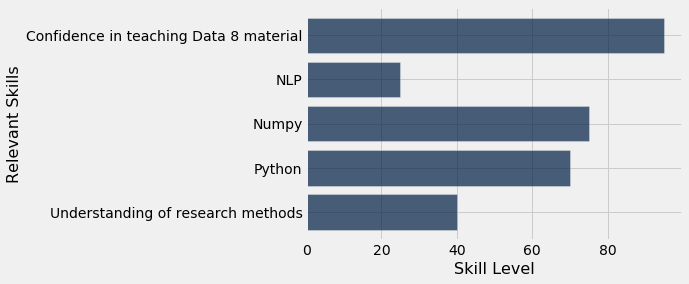

In [76]:
skills = Table().with_columns('Relevant Skills',new2)
a = skills.group(0).relabel(1,'Skill Level').barh(0)

### Q3 Who am I as a person? What interesting personality traits do I bring to the table?

Hi! So we finally meet :) 

I am a third year student at University of California, Berkeley who is detail oriented, multi-tasking, a natural born leader and perfect for your cour….Well, I’m not! Had this been an introduction addressed to any other professional organization, I would’ve begun with this. But I already see a familial community in this wonderful Data 8 course staff! I have met some amazing people on the Data 8 Staff over the last two semesters and I am fortunate to call them my friends! And I want to be vulnerable in front of this Data 8 family, which I can only do by highlighting a few of my weaknesses (which, very honestly, 4 semesters of Berkeley has helped me make great progress towards overcoming them now), not strengths. So, let’s start again!

Hi, I’m Rohil. I tended to procrastinate on work until the last minute. I did not do any work until pushed by peers and pressurized by the deadlines to do so. And not because I didn’t want to do the work, solely because I didn’t like to execute my thoughts as I was worried I wouldn't meet the high standard of work I set for myself. However, on the other side, it meant that I had a lot of time to closely think and scrutinize various aspects of my task. Thus, I believe that I minimized the chance to let any errors pass through in my work. Also, I don’t easily adjust to new environments, which means that I tend to miss my previous one a bit too much. However, this is what lets me stay close and connected to most of my friends in various environments. In other words, I believe this weakness of mine lets me foster long term relationships. Next, my memory doesn’t function in harmony with the long term theory. Simply put, I wouldn’t say that I’m particularly very good at remembering stuff. I often tend to forget the things told to me within short spans of time. However, this is what provides me the motivation to restate and summarize stuff in my own words, a quality that most of the successful tutors stuff.

Lastly, I bring the ability to make jokes on a keyword given on-the-spot. For instance, what do modern trains use to organize themselves? Neural (pronounced New-Rail) Networks!

I will not dissapoint you, if given a chance to be a Data 8 tutor this semester! Hope you have an amazing week ahead :)

**Thank you so much for taking out the time to read this. I genuinely appreciate it! Below is a cute GIF of my favorite dog on the internet as a token of my appreciation :)**

In [89]:
%%html
<a href="https://www.google.com/search?rlz=1C1CHBF_enUS846US846&biw=1536&bih=754&tbm=isch&sxsrf=ACYBGNRo81yU9jAmq7aPJro2bgK66euImg%3A1580374033879&sa=1&ei=EZgyXvqhNZX0-gSig6GAAQ&q=norbert+hifive+gif&oq=norbert+hifive+gif&gs_l=img.3...14546.20242..20980...2.0..0.177.1533.19j1......0....1..gws-wiz-img.....4..35i39j0i8i30j0i24j35i362i39j0i131j0j0i67j0i5i30j0i30.fFMhvuku7Xs&ved=0ahUKEwi67pqH-KrnAhUVup4KHaJBCBAQ4dUDCAc&uact=5#imgrc=QGk2RIpI6J8V-M:">Norbert GIF</a>